In [1]:
# submitted by - Sanjana Pal

In [1]:
# ONE
#sentiment Analysis on ELON MUSk tweets.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import spacy 
from spacy import displacy
nltk.download('vader_lexicon')
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to C:\Users\sanjana
[nltk_data]     pal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# reading the data,some time data is not encoded by UTF-8 ,so we can use different encoders here i am using lation 1
df = pd.read_csv("Elon_musk.csv",encoding='Latin 1')

In [4]:
# first five rows of data
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [22]:
# drop unnamed columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# dropping duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# dropping null values from data
df.dropna(inplace=True)

In [9]:
# text not seen properly for that we are using set_option function.
pd.set_option("display.max_colwidth",None)

In [10]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,1996,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [11]:
df.iloc[1]

Unnamed: 0                                                                                     2
Text          @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
Name: 1, dtype: object

In [12]:
# Remove space between two text and join them to form one paragrapgh.
txt= " ".join(df['Text'])

In [13]:
txt

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

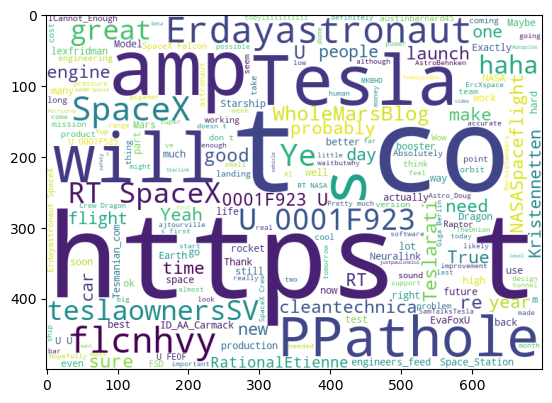

In [14]:
# wordcloud which word occurs many time ,here http occur many time.
wc = WordCloud( background_color='White', width=700,height=500,colormap=None).generate(txt)
plt.imshow(wc)

In [15]:
# importing sentimentanalyzer from nltk(Natural Language Toolkit) to analyzed sentiment into the data
from nltk.sentiment import SentimentIntensityAnalyzer

In [16]:
# create new column which store the value created by polarity score,polarity score convert negative word into -1 and positive into 1
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Text'].apply(lambda x:sid.polarity_scores(x))
df['sentiment_score']

0                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1                 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2          {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
3         {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.2732}
4          {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8513}
                                     ...                               
1994    {'neg': 0.234, 'neu': 0.588, 'pos': 0.178, 'compound': -0.4215}
1995        {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.636}
1996              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1997      {'neg': 0.537, 'neu': 0.463, 'pos': 0.0, 'compound': -0.7003}
1998       {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
Name: sentiment_score, Length: 1999, dtype: object

In [17]:
#anothere column is created,and lambda  to created a function.
df['com_score'] = df['sentiment_score'].apply(lambda x:x['compound'])
df['com_score']

0       0.0000
1       0.0000
2       0.6588
3      -0.2732
4       0.8513
         ...  
1994   -0.4215
1995    0.6360
1996    0.0000
1997   -0.7003
1998    0.4215
Name: com_score, Length: 1999, dtype: float64

In [18]:
# new columns sentiment_label store the value,if value is >=0 it is positive otherwise negative.
df['sentiment_label'] = df['com_score'].apply(lambda x:'positive'if  x>=0 else 'negative')
df['sentiment_label']

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
1994    negative
1995    positive
1996    positive
1997    negative
1998    positive
Name: sentiment_label, Length: 1999, dtype: object

In [19]:
# sentiment count store the positive and negative values.
print(" Sentiment count:",df['sentiment_label'].value_counts())

 Sentiment count: positive    1767
negative     232
Name: sentiment_label, dtype: int64


In [20]:
sentiment_count = df['sentiment_label'].value_counts()

In [21]:
sentiment_percentage = sentiment_count/sentiment_count.sum()*100
sentiment_percentage

positive    88.394197
negative    11.605803
Name: sentiment_label, dtype: float64

- Analyzed the result:As per the above sentiment  label the insights we get are as follows.
    Out of 1999 words ,1769 are positive and 232 are negative

- Total positive percentage of tweets are 88.394197